In [1]:
# Descarga de Paquetes principales

import numpy as np
from keras.models import Sequential
#from keras.models import Dense
import tensorflow as tf
import pandas as pd

# Descarga de los Datos de Entrenamiento y Modelo

## Preparación de Datos

In [2]:
#Aquí leemos los datos de entrenamiento, notar la dependencia del nombre del archivo de estos
# data = pd.read_csv('Data_Entrenamiento2.csv', sep=';')
# data = pd.read_csv('Data_Entrenamiento3.csv', sep=';')
# data = pd.read_csv('Data_Entrenamiento4.csv', sep=';')

data = pd.read_csv('Data_Entrenamiento.csv', sep=';')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,Asignacion
0,0,1,1,1,5,5,20,"5,830951895","3,16227766",4,"5,830951895","4,123105626",5
1,1,2,1,1,5,5,19,"6,08276253",7,"3,605551275","6,08276253","2,828427125",5
2,2,3,1,1,5,5,18,"9,433981132","2,236067977","7,280109889","9,433981132","7,071067812",2
3,3,4,1,0,5,5,18,"7,071067812","5,099019514","6,32455532","7,071067812","6,708203932",3
4,4,5,1,0,4,5,18,"4,472135955","4,472135955","3,16227766","4,472135955","3,605551275",3


In [4]:
#######################################################################################################

##############################
#Aqui haremos la normalización
##############################

#Los datos los generamos en un cuadrado de 10x10, por lo que basta por dividir las distancias por este número, con tal de obtener
#valores entre 0 y 1
#######################################################################################################

Training_Data=[]
Target_Data=[]


for i in range(len(data['Asignacion'])):
  lista=[]
  for j in range(10+1):
    value=data[str(j)][i]
    if type(value) == str:                                    # Los valores de distancias, quedan impprtados como string
      lista.append(float(value.replace(',', '.'))/10)         # Por eso basta pasarlos a float y dividirlos por 10
    else:
      lista.append(value/20)                                  # Aquí dividimos por 20 porque la capacidad máxima es 20,
                                                              # de este modo quedan también normalizados
                                                              # Naturalmente en caso de trabajar con mayores capacidades, dividir por más


####################################################################################
  Training_Data.append(lista)
  Target_Data.append(data['Asignacion'][i]/20)   #Aquí se normalizan los resultados óptimos

####################################################################################
#Imprimimos unas muestras de lo que serán los datos para entrenar la red

for i in range(5):
  print('\n Training_Data: ', Training_Data[i], ',\n Target_Data: ', Target_Data[i])


 Training_Data:  [0.05, 0.05, 0.05, 0.25, 0.25, 1.0, 0.5830951895, 0.316227766, 0.4, 0.5830951895, 0.4123105626] ,
 Target_Data:  0.25

 Training_Data:  [0.1, 0.05, 0.05, 0.25, 0.25, 0.95, 0.608276253, 0.7, 0.36055512749999996, 0.608276253, 0.28284271250000004] ,
 Target_Data:  0.25

 Training_Data:  [0.15, 0.05, 0.05, 0.25, 0.25, 0.9, 0.9433981132, 0.22360679769999997, 0.7280109889, 0.9433981132, 0.7071067812] ,
 Target_Data:  0.1

 Training_Data:  [0.2, 0.05, 0.0, 0.25, 0.25, 0.9, 0.7071067812, 0.5099019514, 0.632455532, 0.7071067812, 0.6708203932] ,
 Target_Data:  0.15

 Training_Data:  [0.25, 0.05, 0.0, 0.2, 0.25, 0.9, 0.44721359549999995, 0.44721359549999995, 0.316227766, 0.44721359549999995, 0.36055512749999996] ,
 Target_Data:  0.15


In [5]:
#Para que la red los pueda leer, los pasamos a array

training_data=np.array(Training_Data)
target_data=np.array(Target_Data)

## Red Neuronal

En esta sección creamos y entrenamos nuestro modelo de red neuronal

In [6]:
# Modelo de Red Neuronal

model = Sequential()
model.add(tf.keras.layers.Dense(16, input_dim=11, activation='relu'))
model.add(tf.keras.layers.Dense(64, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, input_dim=11, activation='relu'))
model.add(tf.keras.layers.Dense(16, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(16, input_dim=11, activation='relu'))
model.add(tf.keras.layers.Dense(64, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(16, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(16, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, input_dim=11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(16, input_dim=11, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [7]:
#########################################################
#Entrenamiento
##########################################################

# Comentar que algunas veces el loss "se pegaba", pero con el correr nuevamente el compilador y volver a entrenar se solucionaba
# Este problema nunca persistió tras cargar dos veces más
##########################################################

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=1000) # Entrenamos con la data obtenida en la sección anterior

Epoch 1/1000
63/63 [==============================] - 4s 6ms/step - loss: 0.0076 - binary_accuracy: 0.0000e+00
Epoch 2/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
Epoch 3/1000
63/63 [==============================] - 0s 5ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
Epoch 4/1000
63/63 [==============================] - 0s 6ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
Epoch 5/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
Epoch 6/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
Epoch 7/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
Epoch 8/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
Epoch 9/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.0036 - binary_accuracy: 0.0000e+00
E

In [8]:
# Para tener una idea de la calidad del entrenamiento, mostramos algunos resultados de como la red predice los
# datos de entrenamiento

predicciones=[]
for i in list(model.predict(training_data)):  #Realizar predicciones sobre la data de entreamiento
  predicciones.append(i[0])

for i in range(300,320):
  print( 'Predicción: ', 20*predicciones[i], ' Resultado Real: ', 20*target_data[i])  #multiplicamos por 20 para "desnormalizar los resultados"

63/63 [==============================] - 0s 1ms/step
Predicción:  3.839867115020752  Resultado Real:  5.0
Predicción:  3.0967977643013  Resultado Real:  3.0
Predicción:  5.0064414739608765  Resultado Real:  5.0
Predicción:  3.515092134475708  Resultado Real:  3.0
Predicción:  4.881182610988617  Resultado Real:  5.0
Predicción:  3.4028303623199463  Resultado Real:  4.0
Predicción:  3.5399460792541504  Resultado Real:  3.0
Predicción:  3.884761333465576  Resultado Real:  3.0
Predicción:  3.5433629155158997  Resultado Real:  4.0
Predicción:  5.006054639816284  Resultado Real:  5.0
Predicción:  4.953920543193817  Resultado Real:  5.0
Predicción:  1.7921249568462372  Resultado Real:  4.0
Predicción:  4.998283684253693  Resultado Real:  5.0
Predicción:  4.7202810645103455  Resultado Real:  5.0
Predicción:  5.005279183387756  Resultado Real:  5.0
Predicción:  5.004605054855347  Resultado Real:  5.0
Predicción:  2.9971149563789368  Resultado Real:  3.0
Predicción:  2.4952101707458496  Resultad

Como era esperable, **los resulados son decimales cuando esperabamos enteros**, lo corregimos con una aproximación simple, se muestra a continuación el mismo proceso, pero tras aproximación

In [9]:
############################################################################
#Predicción de Datos de Entrenamiento
############################################################################

predicciones=[]
for i in list(model.predict(training_data)):
#  predicciones.append(round(i[0]*10))
  predicciones.append(i[0])

for i in range(300,320):
  print( 'Predicción: ', round(20*predicciones[i]), ' Resultado Real: ', round(20*target_data[i]))


63/63 [==============================] - 0s 6ms/step
Predicción:  4  Resultado Real:  5
Predicción:  3  Resultado Real:  3
Predicción:  5  Resultado Real:  5
Predicción:  4  Resultado Real:  3
Predicción:  5  Resultado Real:  5
Predicción:  3  Resultado Real:  4
Predicción:  4  Resultado Real:  3
Predicción:  4  Resultado Real:  3
Predicción:  4  Resultado Real:  4
Predicción:  5  Resultado Real:  5
Predicción:  5  Resultado Real:  5
Predicción:  2  Resultado Real:  4
Predicción:  5  Resultado Real:  5
Predicción:  5  Resultado Real:  5
Predicción:  5  Resultado Real:  5
Predicción:  5  Resultado Real:  5
Predicción:  3  Resultado Real:  3
Predicción:  2  Resultado Real:  2
Predicción:  5  Resultado Real:  5
Predicción:  2  Resultado Real:  1


# Descarga de Datos de Prueba y Predicciones


Veremos ahora el **desempeño verdadero de la red**, contra datos de prueba que han sido generados en el mismo modo que los datos de entramiento

In [11]:
##########################################
# Descarga de datos
##########################################

data = pd.read_csv('Data_Prueba.csv', sep=';')
data.head()

##########################################
# Preparar los datos
##########################################

# Esto es igual a como se hizo para los datos de entranemiento, es decir
# Normalización, cambiar los tipos string a float, y se muestran algunos de los datos exportados

Test_Data=[]
Resultados_Data=[]

##########################################
for i in range(len(data['Asignacion'])):
  lista=[]
  for j in range(10+1):
    value=data[str(j)][i]
    if type(value) == str:
      lista.append(float(value.replace(',', '.'))/10)   # Recordar, esto viene de que los datos están en un cuadrado 10x10
    else:
      lista.append(value/20)                            # Esto es por la capacidad máxima (20)


##############

  Test_Data.append(lista)
  Resultados_Data.append(data['Asignacion'][i])


#########################################
# Mostrar algunos de los datos

for i in range(5):
  print('\n Test_Data: ', Test_Data[i], ',\n Resultados_Data: ', Resultados_Data[i])


#########################################
# Pasar a tipo de dato apropiado, array

Test_Data=np.array(Test_Data)
Resultados_Data=np.array(Resultados_Data)




 Test_Data:  [0.05, 0.05, 0.05, 0.25, 0.25, 1.0, 0.5656854249000001, 0.28284271250000004, 0.316227766, 0.5656854249000001, 0.3] ,
 Resultados_Data:  5

 Test_Data:  [0.1, 0.05, 0.05, 0.25, 0.25, 0.95, 0.36055512749999996, 0.5, 0.22360679769999997, 0.36055512749999996, 0.28284271250000004] ,
 Resultados_Data:  3

 Test_Data:  [0.15, 0.05, 0.05, 0.2, 0.25, 0.95, 0.8062257748, 0.7280109889, 0.5385164807, 0.8062257748, 0.44721359549999995] ,
 Resultados_Data:  5

 Test_Data:  [0.2, 0.05, 0.05, 0.2, 0.25, 0.9, 0.632455532, 0.4, 0.5099019514, 0.632455532, 0.5385164807] ,
 Resultados_Data:  5

 Test_Data:  [0.25, 0.05, 0.05, 0.2, 0.25, 0.85, 0.8544003745, 0.36055512749999996, 0.7, 0.8544003745, 0.7071067812] ,
 Resultados_Data:  5


Pasamos ahora a predecir sobre nuestra data de test con la red ya entrenada

In [12]:
#Predicciones sobre los datos de entrenamiento Test_Data, recalcar que
# en la celda anterior se muestra como son

predicciones=[]
for i in list(model.predict(Test_Data)):
  predicciones.append(i[0])


# Mostrar algunos de los resultados, señalando si son correctos
# Se amplifican por 20 para des-normalizar

for i in range(300,330):
  if round(20*predicciones[i])==round(Resultados_Data[i]):
    print( 'Predicción: ', round(20*predicciones[i]), ' Resultado Real: ', round(Resultados_Data[i]), ' Correcto')
  else:
    print( 'Predicción: ', round(20*predicciones[i]), ' Resultado Real: ', round(Resultados_Data[i]))

63/63 [==============================] - 0s 2ms/step
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  2
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  4  Resultado Real:  1
Predicción:  3  Resultado Real:  4
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  4  Resultado Real:  3
Predicción:  4  Resultado Real:  3
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  4  Resultado Real:  5
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  5  R

# Evaluar y Comparar Resultados

## Comparación

En esta sección, compararemos el resultado de nuestra predicción, contra el método usual, y la asinación óptima

In [14]:
#Recordemos como se ve la data de donde exraemos los datos de prueba

data.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,Asignacion
1995,1995,16,0,0,3,4,10,10,2,"7,615773106",10,"7,280109889",5
1996,1996,17,0,0,3,4,9,"7,615773106","3,16227766","4,472135955","7,615773106","3,605551275",5
1997,1997,18,0,0,3,4,8,"4,242640687","4,242640687",2,"4,242640687","2,236067977",3
1998,1998,19,0,0,2,4,8,"6,708203932",3,"3,605551275","6,708203932","2,828427125",5
1999,1999,20,0,0,2,4,7,"3,16227766","5,830951895","2,828427125","3,16227766","3,605551275",3


In [15]:
# Hacemos una función que nos arroje como resultado la distancia que induce la asignación estándar
# es decir, el store con disponibilidad, que sea más cercano
# como imput, tendrá una de las tuplas de entrenamiento de train_data

def asignacion_estandar(l):

  #Primero dejamos en una lista todas las distacias a las que están los stores disponibles
  disponibles=[]
  for i in range(6, len(l)): #esto es porque al haber un índice y 5 stores, las distancias empiezan en el "espacio" 6
    if l[i-5]>0:
      disponibles.append(l[i])

  #retorna la distancia mínima, porque es la elección que se considera apropiada en este método
  return(min(disponibles))

In [16]:
#########################################################
# Comparación de Errores
#########################################################

# Aquí calcularemos día a día, cual fue la distancia diaria que cada método indujo
# es decir, obtendremos las distancias acumuladas durante los 100 días de prueba

error_optimo=0
error_redes=0
error_asignacion_estandar=0
dias=[]
error_acumulado_redes=[]
error_acumulado_optimo=[]
error_acumulado_asignacion_estanda=[]

################################################################################

for i in range(len(predicciones)):

    # Error de las Redes
    prediccion_red=round(20*predicciones[i])
    error_redes+=float(data[str(5+prediccion_red)][i].replace(',', '.'))  # Se suma 5 por la disposición de espacio de las tuplas

    # Error óptimo
    resultado_optimo=Resultados_Data[i]
    error_optimo+=float(data[str(5+resultado_optimo)][i].replace(',', '.'))

    # Error de la Asignación Estándar
    l=Test_Data[i]*20
    error_asignacion_estandar+=asignacion_estandar(l)

################################################################################

    # Los días los diferenciamos por ser cada 20 ventas
    if i%20==0 and i>1:
      dias.append(len(dias))
      error_acumulado_redes.append(error_redes)
      error_acumulado_optimo.append(error_optimo)
      error_acumulado_asignacion_estanda.append(error_asignacion_estandar)


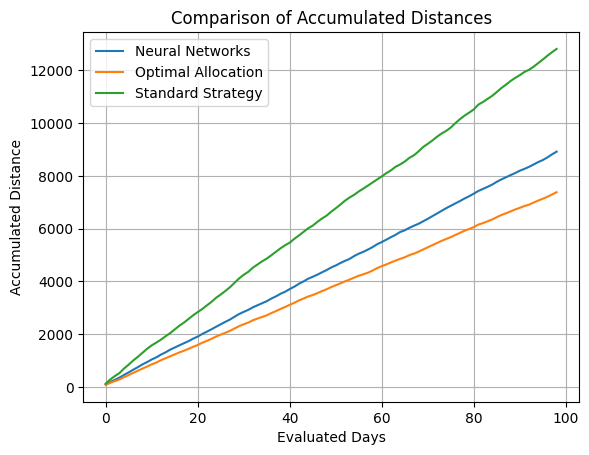

In [17]:
# Gráfica de los Resultados Optenidos

import matplotlib as plt
import matplotlib.pyplot as plt

plt.title('Comparison of Accumulated Distances')
plt.grid()
plt.plot(dias, error_acumulado_redes)
plt.plot(dias, error_acumulado_optimo)
plt.plot(dias, error_acumulado_asignacion_estanda)
plt.legend(['Neural Networks', 'Optimal Allocation', 'Standard Strategy'])
plt.xlabel('Evaluated Days')
plt.ylabel('Accumulated Distance')
plt.show()

## Factibilidad de los Resultados

**Falta verificar que las asignaciones son factibles**

In [18]:
# De aquí rescatamos la capacidad que tiene cada Store, al momento de que se le es asignada
# una venta, según nuestra red neuronal

asignacion_red=[]
capacidad=[]
numero_de_venta=[]

for i in range(len(predicciones)):
 r=round(20*predicciones[i])
 asignacion_red.append(r)
 capacidad.append(float(data[str(r)][i]))
 numero_de_venta.append(float(data[str(0)][i]))


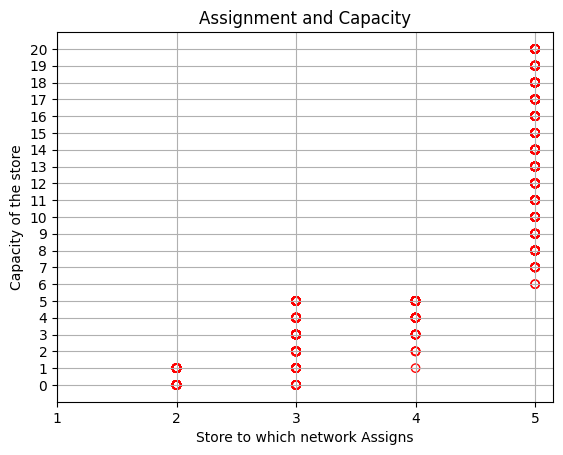

In [19]:
plt.title('Assignment and Capacity')
plt.grid()

plt.scatter(asignacion_red, capacidad, facecolors='none', edgecolors='r')
plt.xlabel('Store to which network Assigns')
plt.ylabel('Capacity of the store')
plt.xticks(range(1,6))
plt.yticks(range(0,21))
plt.show()

Vemos que hay stores con capacidad 0, a los que también se les asignaron ventas, lo que es un error.
Esto también puede notarse en la distribucipon de ventas según capacidad, en el siguiente histograma

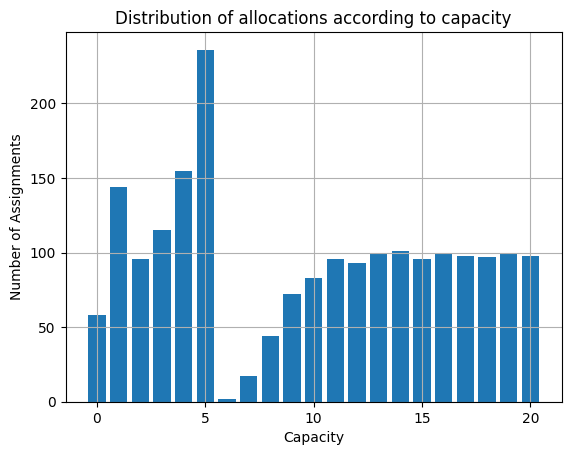

In [20]:
lista = capacidad
dic=dict(zip(lista,map(lambda x: lista.count(x),lista)))

# Datos
x = list(dic.keys())
y = list(dic.values())

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
plt.grid()
plt.title('Distribution of allocations according to capacity')
plt.xlabel('Capacity')
plt.ylabel('Number of Assignments')
plt.show()

# Corrección Heurística del Predictor

Nuestra estrategia de corrección, es que cuando la red me asigne un store con capacidad cero, se hará un reasignamiento al store con más capacidad inicial, en este caso, el número 5 (Capacidad Inicial 20)

In [21]:
predicciones_red=list(model.predict(Test_Data))
predicciones_corregidas=[]

# Corregir los casos donde habían malas asignaciones
for i in range(len(predicciones_red)):
  predict=round(20*predicciones[i])
  if list(Test_Data)[i][predict]==0:          # Identificar asignaciones inviables
    predicciones_corregidas.append(5/20)
  else:
    predicciones_corregidas.append(predicciones_red[i][0])

63/63 [==============================] - 0s 1ms/step


In [22]:
# Haremos la misma comparación de antes, pero esta vez incluyendo el error inducido
# tras hacer una corrección en las asignaciones inviables

error_optimo=0
error_redes=0
error_asignacion_estandar=0
error_redes_corregida=0
dias=[]
error_acumulado_redes=[]
error_acumulado_optimo=[]
error_acumulado_asignacion_estanda=[]
error_acumulado_redes_corregido=[]

################################################################################

for i in range(len(predicciones)):
    prediccion_red=round(20*predicciones[i])
    error_redes+=float(data[str(5+prediccion_red)][i].replace(',', '.'))

    prediccion_red_corregida=round(20*predicciones_corregidas[i])
    error_redes_corregida+=float(data[str(5+prediccion_red_corregida)][i].replace(',', '.'))

    resultado_optimo=Resultados_Data[i]
    error_optimo+=float(data[str(5+resultado_optimo)][i].replace(',', '.'))


    l=Test_Data[i]*20
    error_asignacion_estandar+=asignacion_estandar(l)

################################################################################

    if i%20==0 and i>1:
      dias.append(len(dias))
      error_acumulado_redes.append(error_redes)
      error_acumulado_optimo.append(error_optimo)
      error_acumulado_asignacion_estanda.append(error_asignacion_estandar)
      error_acumulado_redes_corregido.append(error_redes_corregida)


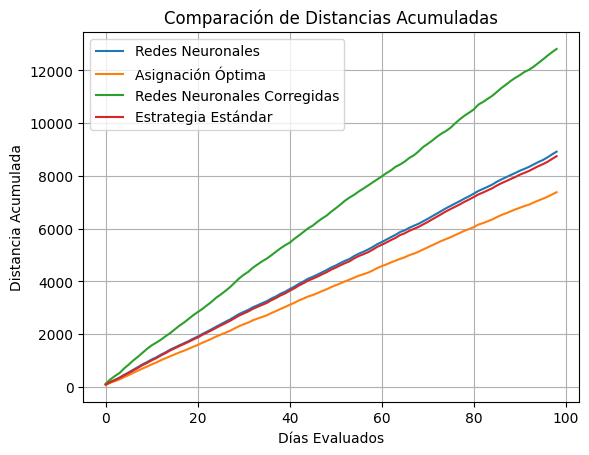

In [25]:
# Comparamos y vemos que el la asignación por redes, y por redes tras la correción, casi no difiere

plt.title('Comparación de Distancias Acumuladas')
plt.grid()
plt.plot(dias, error_acumulado_redes)
plt.plot(dias, error_acumulado_optimo)
plt.plot(dias, error_acumulado_asignacion_estanda)
plt.plot(dias, error_acumulado_redes_corregido)
plt.legend(['Redes Neuronales', 'Asignación Óptima', 'Redes Neuronales Corregidas', 'Estrategia Estándar'])
plt.xlabel('Días Evaluados')
plt.ylabel('Distancia Acumulada')
plt.show()

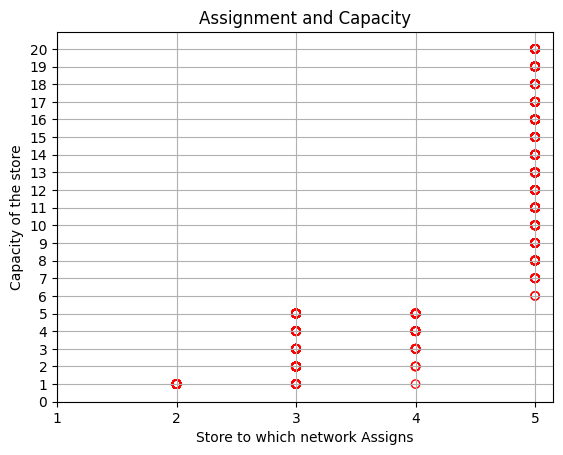

In [26]:
# Podemos ver que ya no existen asignaciones hacia stores sin capacidad

asignacion_red_corregida=[]
capacidad_corregida=[]
numero_de_venta=[]

for i in range(len(predicciones_corregidas)):

 r=round(20*predicciones_corregidas[i])
 asignacion_red_corregida.append(r)
 capacidad_corregida.append(float(data[str(r)][i]))
 numero_de_venta.append(float(data[str(0)][i]))

plt.title('Assignment and Capacity')
plt.grid()

plt.scatter(asignacion_red_corregida, capacidad_corregida, facecolors='none', edgecolors='r')

#plt.legend(['Redes Neuronales', 'Asignación Óptima', 'Estrategia Estandar'])
plt.xlabel('Store to which network Assigns')
plt.ylabel('Capacity of the store')
plt.xticks(range(1,6))
plt.yticks(range(0,21))
plt.show()

# Visualización de la distribución

Esta sección es sólo para ver si se parecen las asignaciones predichas a las óptimas. **Sólo tiene el fin de Visualizar**

Se hace exactamente lo mismo de antes, con otros datos de prueba que son llamados Ejemplo_Asignacion_Datos_Prueba

In [ ]:
##########################################
# Descarga de datos
##########################################

data = pd.read_csv('Ejemplo_Asignacion_Datos_Prueba.csv', sep=';')
data.head()

##########################################
# Preparar los datos
##########################################

Test_Data=[]
Resultados_Data=[]

##########################################
for i in range(len(data['Asignacion'])):
  lista=[]
  for j in range(10+1):
    value=data[str(j)][i]
    if type(value) == str:
      lista.append(float(value.replace(',', '.'))/10)
    else:
      lista.append(value/20)
#####
  Test_Data.append(lista)
  Resultados_Data.append(data['Asignacion'][i])


#########################################
for i in range(10):
  print('Test_Data: ', Test_Data[i], ', Resultados_Data: ', Resultados_Data[i])


#########################################
Test_Data=np.array(Test_Data)
Resultados_Data=np.array(Resultados_Data)

Test_Data:  [0.05, 0.05, 0.05, 0.25, 0.25, 1.0, 0.7668242717, 0.0911658493, 0.2552706259, 0.2700942392, 0.2867476725] , Resultados_Data:  5
Test_Data:  [0.1, 0.05, 0.05, 0.25, 0.25, 0.95, 0.2843457494, 0.5480887446, 0.3774945717, 0.6977030519, 0.7373543208] , Resultados_Data:  3
Test_Data:  [0.15, 0.05, 0.05, 0.2, 0.25, 0.95, 0.2612235156, 0.9550096566, 0.8490414511000001, 0.9039036320999999, 1.175476623] , Resultados_Data:  5
Test_Data:  [0.2, 0.05, 0.05, 0.2, 0.25, 0.9, 0.26802831829999996, 0.518892326, 0.3725003503, 0.6262450513, 0.7230963685] , Resultados_Data:  5
Test_Data:  [0.25, 0.05, 0.05, 0.2, 0.25, 0.85, 0.6166043981, 0.5359104518, 0.5774325946000001, 0.2992676164, 0.7405129952] , Resultados_Data:  4
Test_Data:  [0.3, 0.05, 0.05, 0.2, 0.2, 0.85, 0.9474753674, 0.3199389622, 0.5048842149999999, 0.1686361522, 0.3962379063] , Resultados_Data:  5
Test_Data:  [0.35, 0.05, 0.05, 0.2, 0.2, 0.8, 0.757891374, 0.1721958964, 0.3155829767, 0.19148066219999998, 0.3559650199] , Resultados_

In [ ]:
predicciones=[]
for i in list(model.predict(Test_Data)):
  predicciones.append(i[0])

l=len(model.predict(Test_Data))
valores_predichos=[0]*5
valores_reales=[0]*5

for i in range(l-20,l):
  if round(20*predicciones[i])==round(Resultados_Data[i]):
    print( 'Predicción: ', round(20*predicciones[i]), ' Resultado Real: ', round(Resultados_Data[i]), ' Correcto')
  else:
    print( 'Predicción: ', round(20*predicciones[i]), ' Resultado Real: ', round(Resultados_Data[i]))

  valores_predichos.append(round(20*predicciones[i]))
  valores_reales.append(round(Resultados_Data[i]))

63/63 [==============================] - 0s 1ms/step
Predicción:  4  Resultado Real:  4  Correcto
Predicción:  3  Resultado Real:  5
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  4  Resultado Real:  5
Predicción:  2  Resultado Real:  1
Predicción:  4  Resultado Real:  4  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  4  Resultado Real:  4  Correcto
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  3  Resultado Real:  5
Predicción:  3  Resultado Real:  3  Correcto
Predicción:  4  Resultado Real:  4  Correcto
Predicción:  3  Resultado Real:  2
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  5  Resultado Real:  5  Correcto
Predicción:  4  Resultado Real:  4  Correcto
Predicción:  4  Resultado Real:  5
Predicción:  3  Resultado Real:  3  Correcto


## Importamos los datos de ubicación, y los exportamos agregando la asignación

In [ ]:
Ejemplo_Asignacion = pd.read_csv('Ejemplo_Asignacion.csv', sep=';')
Ejemplo_Asignacion['Asignacion_Predicha']=valores_predichos
Ejemplo_Asignacion['Asignacion_Optima']=valores_reales
Ejemplo_Asignacion.tail()

,Unnamed: 0,Categoria,X,Y,Asignacion_Predicha,Asignacion_Optima
20,20,0,"2,034743955","9,660877257",5,5
21,21,0,"2,150055412","7,528861521",5,5
22,22,0,"6,112436601","8,275342939",4,4
23,23,0,"2,039212073","0,029749363",4,5
24,24,0,"4,14312313","1,959592671",3,3


In [ ]:
Ejemplo_Asignacion.to_excel('Ejemplo_Asignacion_Redes.xlsx', index=True)

El tipo de datos no se lle bien, así que se arregló en un excel, se deja este adjunto, luego leelos lo antes exportado

In [ ]:
Ejemplo_Asignacion = pd.read_excel('Ejemplo_Asignacion_Redes.xlsx')
Ejemplo_Asignacion.tail()

,Unnamed: 0.1,Unnamed: 0,Categoria,X,Y,Asignacion_Predicha,Asignacion_Optima
20,20,20,0,2.034744,9.660877,5,5
21,21,21,0,2.150055,7.528862,5,5
22,22,22,0,6.112437,8.275343,4,4
23,23,23,0,2.039212,0.029749,4,5
24,24,24,0,4.143123,1.959593,3,3


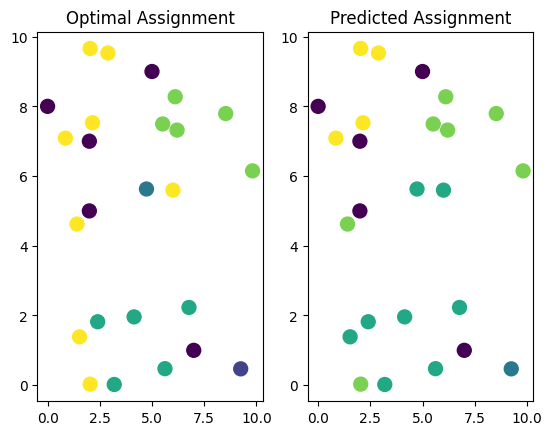

In [ ]:

#plot 1:

plt.subplot(1, 2, 1)
plt.scatter(Ejemplo_Asignacion['X'],Ejemplo_Asignacion['Y'], c=Ejemplo_Asignacion['Asignacion_Optima'], s=100)
plt.title('Optimal Assignment')

#plot 2:

plt.subplot(1, 2, 2)
plt.scatter(Ejemplo_Asignacion['X'],Ejemplo_Asignacion['Y'], c=Ejemplo_Asignacion['Asignacion_Predicha'], s=100)
plt.title('Predicted Assignment')

plt.show()